<center>
        <img src="../../img/ods_logo.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitskiy](https://yorko.github.io). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Topic 1. Exploratory data analysis with Pandas
## <center>Practice. Analyzing "Titanic" passengers

**Fill in the missing code ("You code here") and choose answers in a [web-form](https://docs.google.com/forms/d/16EfhpDGPrREry0gfDQdRPjoiQX9IumaL2mPR0rcj19k/edit).**

In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option("display.precision", 2)

**Read data into a Pandas DataFrame**

In [21]:
data = pd.read_csv('../../data/titanic_train.csv',
                  index_col='PassengerId')

**First 5 rows**

In [3]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [4]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


**Let's select those passengers who embarked in Cherbourg (Embarked=C) and paid > 200 pounds for their ticker (fare > 200).**

Make sure you understand how actually this construction works.

In [5]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.52,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.33,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.52,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.50,C82,C


**We can sort these people by Fare in descending order.**

In [6]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.33,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.33,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.33,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C


**Let's create a new feature.**

In [6]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age > 30 & age < 55:
        return 2
    elif age >= 55:
        return 3

In [18]:
#age_categories = [age_category(age) for age in data.Age]
#data['Age_category'] = age_categories

**Another way is to do it with `apply`.**

In [19]:
#data['Age_category'] = data['Age'].apply(age_category)

**1. How many men/women were there onboard?**
- 412 men and 479 women
- 314 men и 577 women
- 479 men и 412 women
- 577 men и 314 women

In [11]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

**2. Print the distribution of the `Pclass` feature. Then the same, but for men and women separately. How many men from second class were there onboard?**
- 104
- 108
- 112
- 125

In [35]:

pd.crosstab(data['Pclass'],data['Sex'],margins=True)



Sex,female,male,All
Pclass,,,
1,94,122,216
2,76,108,184
3,144,347,491
All,314,577,891


Hist for above distribution


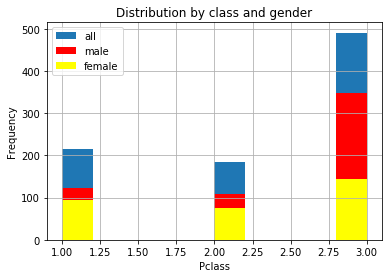

In [53]:
data['Pclass'].hist(label='all')
data[data['Sex']=='male']['Pclass'].hist(color='red',label='male')
data[data['Sex']=='female']['Pclass'].hist(color='yellow',label='female')
plt.title('Distribution by class and gender')
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.legend(loc='upper left')



**3. What are median and standard deviation of `Fare`?. Round to two decimals.**
- median is  14.45, standard deviation is 49.69
- median is 15.1, standard deviation is 12.15
- median is 13.15, standard deviation is 35.3
- median is  17.43, standard deviation is 39.1

In [57]:
df=data['Fare'].median()
print('median is:',round(df,2))
df=data['Fare'].std()
print('stanrad deviation is :', round(df,2))


median is: 14.45
stanrad deviation is : 49.69


In [60]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


**4. Is that true that the mean age of survived people is higher than that of passengers who eventually died?**
- Yes
- No


In [69]:
df=data[data['Survived']==1]['Age'].mean() # mean age of survived people 
print("mean age of survived people:",df)
df1=data[data['Survived']==0]['Age'].mean()
print("mean age of died people:",df1)

df > df1

mean age of survived people: 28.343689655172415
mean age of died people: 30.62617924528302


False

### Histogram of Above question

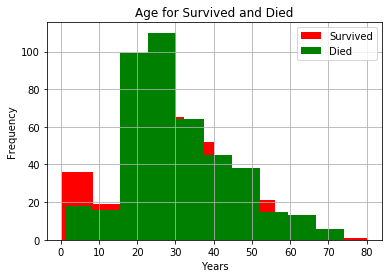

In [86]:
data[data['Survived']==1]['Age'].hist(color="red", 
                                         label='Survived')
data[data['Survived']==0]['Age'].hist(color="green", 
                                         label='Died',)
plt.title('Age for Survived and Died')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.legend()


**5. Is that true that passengers younger than 30 y.o. survived more frequently than those older than 60 y.o.? What are shares of survived people among young and old people?**
- 22.7% among young and 40.6% among old
- 40.6% among young and 22.7% among old
- 35.3% among young and 27.4% among old
- 27.4% among young and  35.3% among old

In [109]:
#code here
young_survived=data.loc[data['Age']<30,'Survived']
old_survived=data.loc[data['Age']>60,'Survived']
print('share of survived people among young:  {}% \n\n and share of survived people among old: {}%'.format(round(100*young_survived.mean(),1),
                                                                              round(100*old_survived.mean(),1)))




share of survived people among young:  40.6% 

 and share of survived people among old: 22.7%


**6. Is that true that women survived more frequently than men? What are shares of survived people among men and women?**
- 30.2% among men and 46.2% among women
- 35.7% among men and 74.2% among women
- 21.1% among men and 46.2% among women
- 18.9% among men and 74.2% among women

In [120]:
male_survived=data[data['Sex']=='male']['Survived']
female_survived=data.loc[data['Sex']=='female','Survived']
print("Shares of survived people: \n\t among women {}%, \n\t among men {}%".format(
    round(100 * female_survived.mean(), 1), round(100 * male_survived.mean(), 1)))

Shares of survived people: 
	 among women 74.2%, 
	 among men 18.9%


**7. What's the most popular first name among male passengers?**
- Charles
- Thomas
- William
- John

In [125]:
data['Name'].head(5)

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [137]:
data.loc[1,'Name'].split(',')[1].split()[1]

'Owen'

In [138]:
first_name=data.loc[data['Sex']=='male','Name'].apply(lambda full_name:full_name.split(',')[1].split()[1])

In [140]:
first_name.value_counts().head(5)

William    35
John       25
George     14
Thomas     13
Charles    13
Name: Name, dtype: int64

**8. How is average age for men/women dependent on `Pclass`? Choose all correct statements:**
- On average, men of 1 class are older than 40
- On average, women of 1 class are older than 40
- Men of all classes are on average older than women of the same class
- On average, passengers ofthe first class are older than those of the 2nd class who are older than passengers of the 3rd class

In [143]:
pd.crosstab(data['Pclass'],data['Sex'],
           values=data['Age'],aggfunc=np.mean)

Sex,female,male
Pclass,,
1,34.61,41.28
2,28.72,30.74
3,21.75,26.51


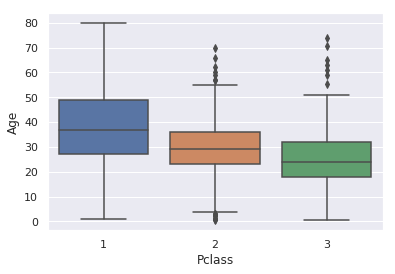

In [146]:
import seaborn as sns
sns.set()
sns.boxplot(data['Pclass'],data['Age'])

/home/redbend/.local/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


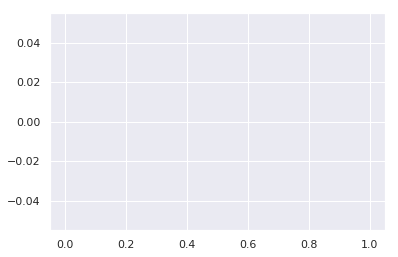

## Useful resources
* The same notebook as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-1-practice-analyzing-titanic-passengers) with a [solution](https://www.kaggle.com/kashnitsky/topic-1-practice-solution)
* Topic 1 "Exploratory Data Analysis with Pandas" as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas)
* Main course [site](https://mlcourse.ai), [course repo](https://github.com/Yorko/mlcourse.ai), and YouTube [channel](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX)